## プロポーズしたいとします。どんなダイヤモンドがいいのだろう？
一生に、(おそらく)一度しかないプロポーズ。  
失敗はしたくないけれど、どんなダイヤモンドがあって、でも手元には数千万円あるわけでもなく、数百万のでっかいダイヤモンドは買えない。  
でも、できうる限り最大限の(コスパの良い)ものを買ってあげたい！  
  
と思った時、どうしますか？？

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import matplotlib.pyplot as plt

In [3]:
### ダイヤモンドのデータセット
diamonds = sns.load_dataset('diamonds')

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

**ダイヤモンドは、"カラット", "カット", "カラー", "カラリティ", "深さ", "価格", "構造(x, y, z)"**  
**のデータセットとなっている**

<img src=https://images.brilliance.co.jp/engagement/select/howtochoose/htc06-diamond-proportion.svg>

**まずは、このデータの統計量を見てみる**

In [6]:
type(diamonds)

pandas.core.frame.DataFrame

**Seabornで読み込んだデータセットは、データ型がPandasのDataFrameであるから**  
**Pandasの統計用の関数が、そのまま利用できる**

In [7]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


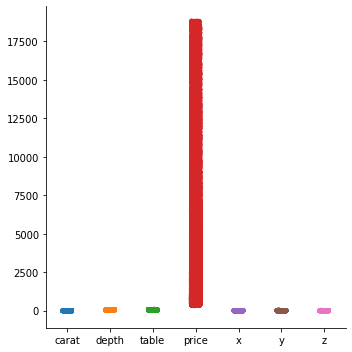

In [8]:
sns.catplot(data=diamonds)

**単純に箱ひげを、なんの引数も与えずに呼び出しても、Priceに引っ張られるため**  
**あまり可視化する意味はなさそう、ということがわかる**

**ここで、よく見てみると "cut", "color"が見れていない**  
※単純に数値ではなく、カテゴリであるため描画されない  
  
なので、x軸に、"cut", "color"をそれぞれセットしてみる＆y軸に数値のデータをそれぞれセットしてみる  
"cut", "color"のそれぞれユニークな値は、

In [9]:
print(diamonds["cut"].unique())
print(diamonds["color"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


**これらがx軸のカテゴリデータになる**

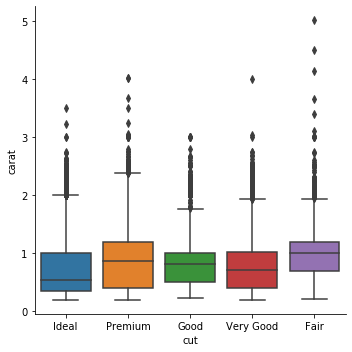

In [10]:
sns.catplot(x="cut", y="carat", kind="box", data=diamonds)

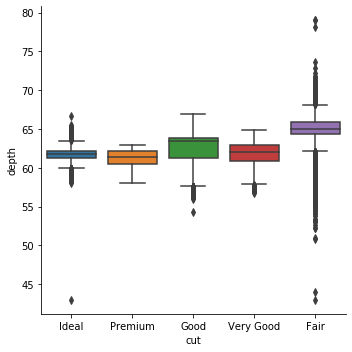

In [11]:
sns.catplot(x="cut", y="depth", kind="box", data=diamonds)

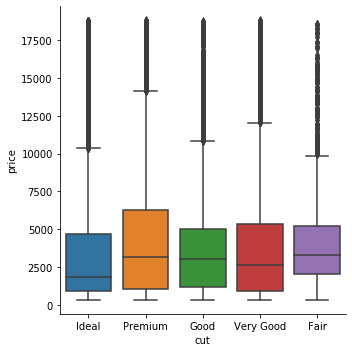

In [12]:
sns.catplot(x="cut", y="price", kind="box", data=diamonds)

"color"は...

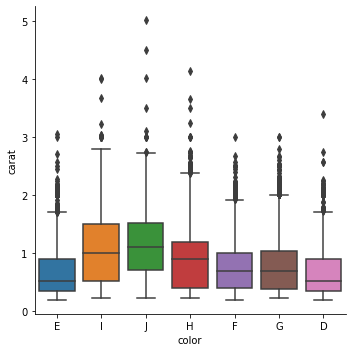

In [13]:
sns.catplot(x="color", y="carat", kind="box", data=diamonds)

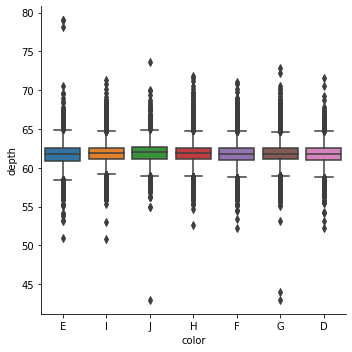

In [14]:
sns.catplot(x="color", y="depth", kind="box", data=diamonds)

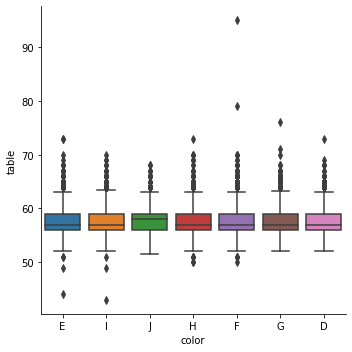

In [15]:
sns.catplot(x="color", y="table", kind="box", data=diamonds)

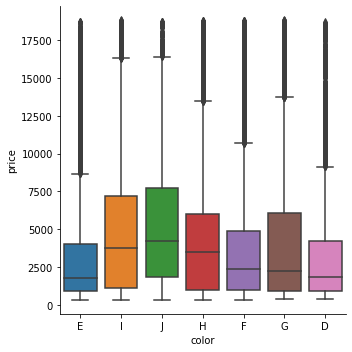

In [16]:
sns.catplot(x="color", y="price", kind="box", data=diamonds)

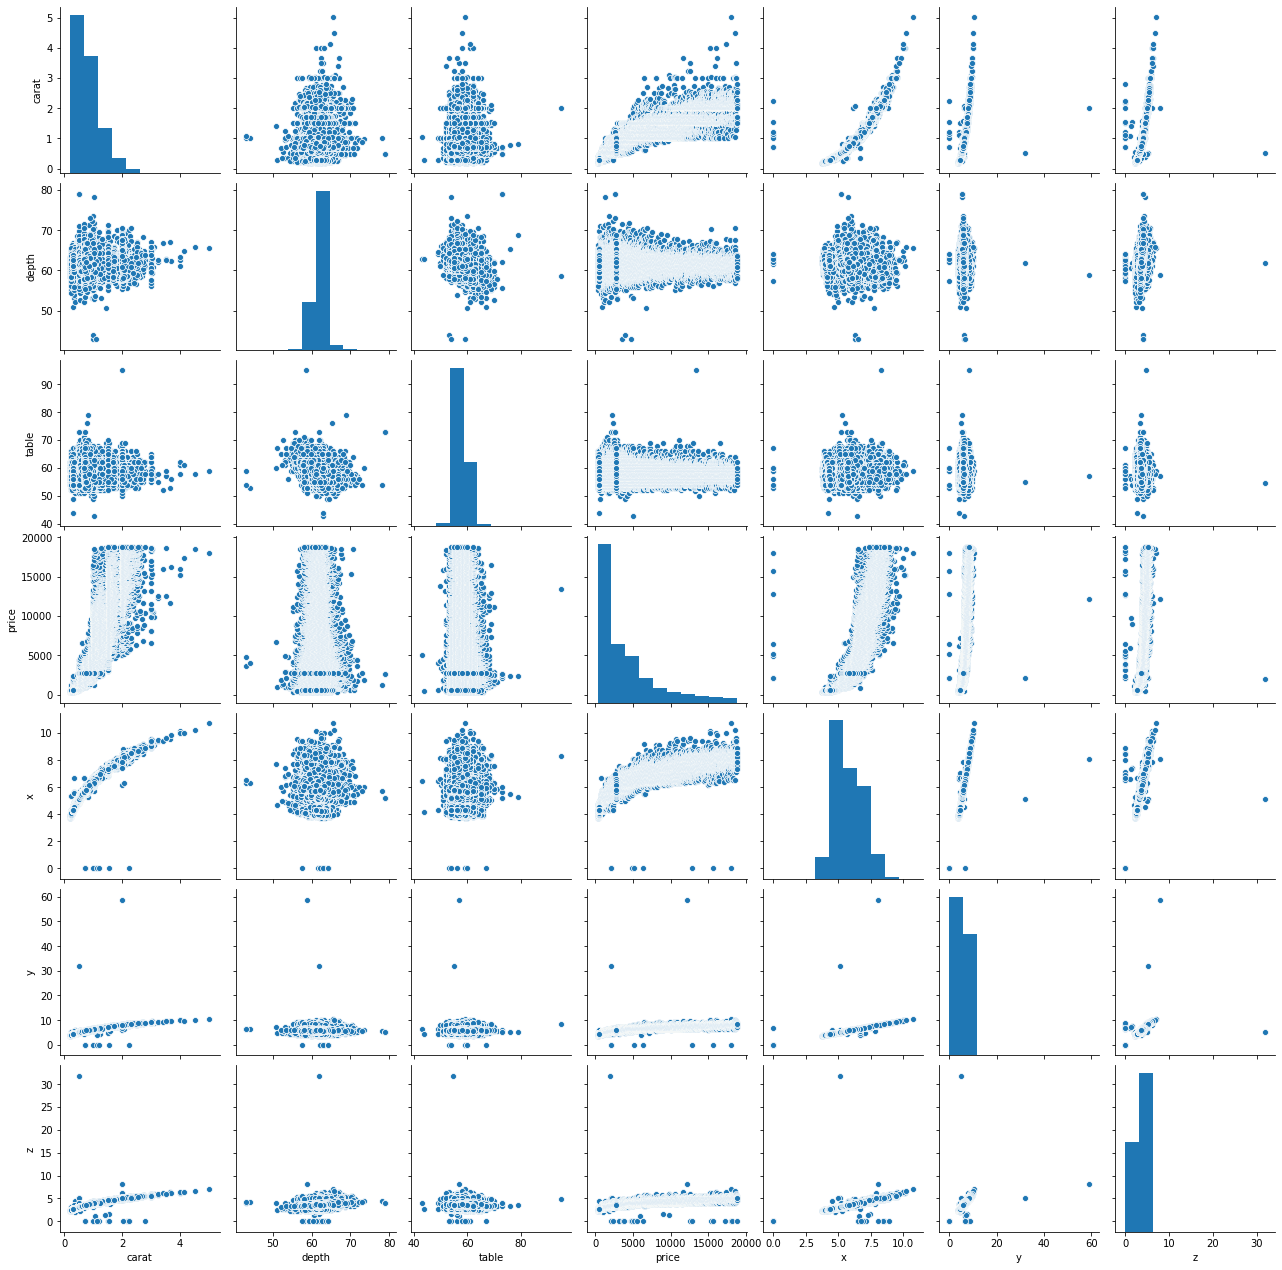

In [17]:
sns.pairplot(diamonds)

In [17]:
corr = diamonds.corr()

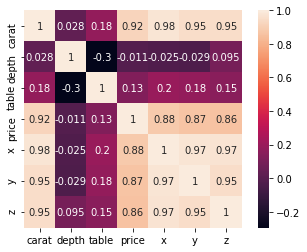

In [18]:
sns.heatmap(corr, square=True, annot=True)

**"carat", "price", "x", "y", "z"**  
は相関が非常に強い...  
  
一方、"depth", "table"は関係ない？？  
いや、まて...待て待て待て

**やはりここでも、"cut", "color"**が見れないので、こちらは独自でみていく

**ここで、「データサイエンスを学ぶ 第3回」の内容が活きてくる...**  
文字列に対しては、"Encording"してあげれば良い。  
  
"cut", "color"は両方とも、何かしらの"質"を表現している...  
"One-Hot Encording", "Label Encording" ,...  

<img src=https://images.brilliance.co.jp/engagement/select/howtochoose/htc06-cut-chart-01.svg>

**Dカラー(カラーレス)**  
カラーグレードの中でも最上のダイヤモンドにだけ格付けされる完全に「無色」の評価がDカラー。  
この最上のグレードは希少性がとても高い評価です。  
  
**Eカラー**  
「無色」グレードでDカラーに次いで2番目に位置する評価のEカラー。  
熟練の鑑定士でも無色に見え、色の痕跡、違いを見つけるのは困難です。  
  
**Fカラー**  
「無色」グレードの中で最後に位置する評価のFカラー。  
熟練の鑑定士でもごく僅かな色を認識できるほどで肉眼では確認することが非常に困難なグレード。  
  
**Gカラー**  
「ほぼ無色」グレードと評価されるニアカラーレスの中で最上のグレード。  
熟練の鑑定士が注意深くほかのダイヤモンドと比較してやっと色が認められる程度。  
  
**Hカラー**  
「ほぼ無色」グレードで2番目に位置するHカラー。  
はるかに高いカラーグレードと比較した場合にやっと色が認められる程度。  
指輪に留められると熟練の鑑定士でも見分けることが困難。  
  
https://bijoupiko.com/diamond/4c_color/#:~:text=%E3%83%80%E3%82%A4%E3%83%A4%E3%83%A2%E3%83%B3%E3%83%89%E3%81%AE%E7%90%86%E6%83%B3%E3%81%AF%E7%84%A1%E8%89%B2%E9%80%8F%E6%98%8E&text=%E3%81%9D%E3%81%AE%E8%89%B2%E3%81%AFGIA%EF%BC%88%E7%B1%B3%E5%9B%BD,%E7%AD%89%E7%B4%9A%E3%81%AB%E5%88%86%E9%A1%9E%E3%81%95%E3%82%8C%E3%81%BE%E3%81%99%E3%80%82

In [19]:
cut_dict = {"Fair":1,
            "Good":2,
            "Very Good":3,
            "Premium":4,
            "Ideal":5}
color_dict = {"H":1,
              "G":2,
              "F":3,
              "E":4,
              "D":5}

In [20]:
print(cut_dict)
print(color_dict)

{'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
{'H': 1, 'G': 2, 'F': 3, 'E': 4, 'D': 5}


In [21]:
print(type(cut_dict))
print(type(color_dict))

<class 'dict'>
<class 'dict'>


**対応するものに関しては、辞書型で定義したりします(絶対ではない)**

**ここで元々のDataFrameを、置き換えていく...**

In [22]:
cut_list = diamonds["cut"].tolist()
color_list = diamonds["color"].tolist()

In [23]:
print(len(cut_list), len(color_list))

53940 53940


In [24]:
print(cut_list[0], type(cut_list[0]))
print(color_list[0], type(color_list[0]))

Ideal <class 'str'>
E <class 'str'>


In [25]:
cut_list_new = []
for ele in cut_list:
    cut_list_new += [value for key, value in cut_dict.items() if ele == key]

In [26]:
color_list_new = []
for ele in color_list:
    color_list_new += [value for key, value in color_dict.items() if ele == key]

In [27]:
print(len(cut_list_new), len(color_list_new))

53940 45710


**!?**

In [28]:
print(diamonds["color"].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']


**脳死的に、こういった作業を行なっていくと、あるあるパターンです...**  
[ダイヤモンドのカラー](https://4cs.gia.edu/ja-jp/%E3%83%80%E3%82%A4%E3%83%A4%E3%83%A2%E3%83%B3%E3%83%89%E3%81%AE%E3%82%AB%E3%83%A9%E3%83%BC/)

In [29]:
color_dict = {"J":1,
              "I":2,
              "H":3,
              "G":4,
              "F":5,
              "E":6,
              "D":7}

In [30]:
color_list_new = []
for ele in color_list:
    color_list_new += [value for key, value in color_dict.items() if ele == key]

In [31]:
print(len(cut_list_new), len(color_list_new))

53940 53940


In [32]:
print(cut_list_new[0], type(cut_list_new[0]))
print(color_list_new[0], type(color_list_new[0]))

5 <class 'int'>
6 <class 'int'>


**ここで、文字列から数値に、Label Encordingしたものに置き換えます**

In [33]:
diamonds["cut"] = cut_list_new
diamonds["color"] = color_list_new

In [34]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,SI2,61.0,58.0,2757,6.15,6.12,3.74


**はい、ここでまた脳死案件です...**  
**ちゃっかり、"clarity"の存在を忘れていましたw**  
<img src=https://blogimg.goo.ne.jp/user_image/43/71/1c792a783e57ea4ae9160dbdec2bdfac.jpg>  
[ダイヤモンドのクラリティ](https://4cs.gia.edu/ja-jp/%E3%83%80%E3%82%A4%E3%83%A4%E3%83%A2%E3%83%B3%E3%83%89%E3%81%AE%E3%82%AF%E3%83%A9%E3%83%AA%E3%83%86%E3%82%A3/)

In [35]:
print(diamonds["clarity"].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [36]:
clarity_dict = {"I1":1,
                "SI2":2,
                "SI1":3,
                "VS2":4,
                "VS1":5,
                "VVS2":6,
                "VVS1":7,
                "IF":8}

In [37]:
clarity_list = diamonds["clarity"].tolist()
clarity_list_new = []
for ele in clarity_list:
    clarity_list_new += [value for key, value in clarity_dict.items() if ele == key]

In [38]:
print(len(clarity_list_new))
print(clarity_list_new[0], type(clarity_list_new[0]))

53940
2 <class 'int'>


In [39]:
diamonds["clarity"] = clarity_list_new

In [40]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


**やっと、整いました！**  
**改めて、Seabornで相関を可視化してみます**

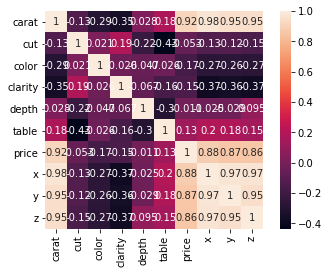

In [41]:
corr = diamonds.corr()
sns.heatmap(corr, square=True, annot=True)

**ちょっと、みづらいのでサイズを大きくします**

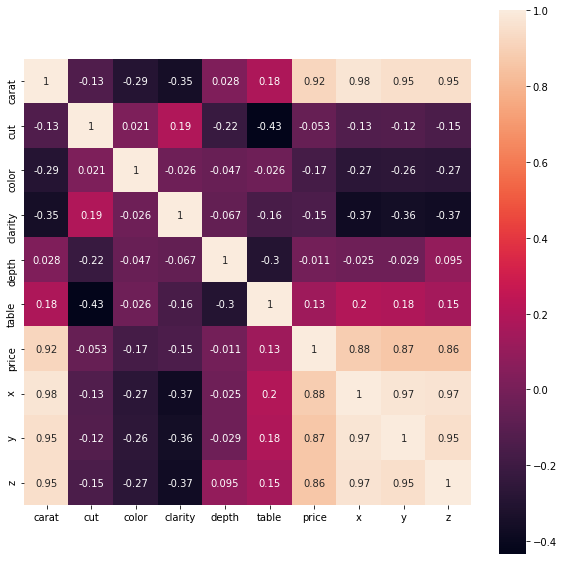

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)

**"carat"と"clarity", "carat"と"color"...負の相関、弱い負の相関がありつつ、"cut"と"depth"についても弱い負の相関があるので**  
**なんとなく、の考察ですが...**  
ダイヤモンドは、デカければデカイほど値段は張る一方で、  
デカいと全体的な3Cの質が劣ってくる？？

### さて、どうしたものか...これでは「意思決定」ができない  
**そうだ、決定木を使うことで、何かしらのアクションが取れるかも！**

In [43]:
# Scikit Learnから、決定木モデルを呼び込む
from sklearn import tree

**意思決定、この場合は「xxxなダイヤモンドならば、買う or 買わない」だろうか**  
そうなると、判断基準は、第一に価格と思う。  
  
データを用意しよう  
ここで、"x", "y", "z"と"carat"はほぼ同義なので、"x", "y", "z"は今回覗いてみる

In [151]:
diamonds_shuffle = diamonds.sample(frac=1)
diamonds_X = diamonds_shuffle[["carat", "cut", "color", "clarity", "depth", "table"]]
diamonds_y = diamonds_shuffle["price"]

In [152]:
diamonds_X

,carat,cut,color,clarity,depth,table
45597,0.50,5,7,4,61.9,55.0
19642,1.24,5,3,4,60.8,56.0
14358,1.02,3,6,3,62.6,58.0
17171,1.09,5,4,5,62.5,56.0
835,0.82,5,5,2,61.7,53.0
...,...,...,...,...,...,...
38938,0.40,5,6,5,62.0,54.0
27788,0.37,5,6,3,62.7,54.0
42162,0.53,5,4,3,61.0,56.0
25238,2.01,3,2,3,60.8,60.0


In [153]:
diamonds_y

45597     1690
19642     8257
14358     5814
17171     6856
835       2867
         ...  
38938     1053
27788      649
42162     1284
25238    13849
18124     7338
Name: price, Length: 53940, dtype: int64

In [154]:
# DataFrame型、Series型を、Numpyの配列に変換する
diamonds_X_array = diamonds_X.values
diamonds_y_array = diamonds_y.values

**あえて分類モデルを作ってみて、その精度も確認してみたい**  
**学習データと検証データに分けて、学習データでモデルを構築して検証データで精度を確認する**

In [155]:
diamonds_X_train = diamonds_X_array[:40000]
diamonds_y_train = diamonds_y_array[:40000]
diamonds_X_test = diamonds_X_array[40000:]
diamonds_y_test = diamonds_y_array[40000:]

In [157]:
print(len(diamonds_X_train), type(diamonds_X_train))
print(len(diamonds_y_train), type(diamonds_y_train))
print(len(diamonds_X_test), type(diamonds_X_test))
print(len(diamonds_y_test), type(diamonds_y_test))

40000 <class 'numpy.ndarray'>
40000 <class 'numpy.ndarray'>
13940 <class 'numpy.ndarray'>
13940 <class 'numpy.ndarray'>


**用意した機械学習用のデータで、いざモデルを作ってみる**

In [158]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(diamonds_X_train, diamonds_y_train)

**検証データの、説明変数のみを使って予測してみる**

In [159]:
predicted = clf.predict(diamonds_X_test)

**果たして精度は...**

In [160]:
sum(predicted_next == diamonds_y_test) / len(diamonds_y_test)

0.0

**なんと、ゼロ％！！！**  
まぁ、実は当たり前なんですけどね。。。  
  
もう一回、データをみてみましょう  
目的変数は...”price”でした、すなわち「価格」です。  
正解ラベル、正解データである、"diamonds_y_test"をみてみましょう

In [161]:
diamonds_y_test

array([ 1890,   449,  8585, ...,  1284, 13849,  7338])

「価格」って、この場合いろいろな整数値をとってますよね？  
つまりそのオリジナルな整数値の個数分、正確に当ててくれ、と言ってます。  
  
一方、予測結果をみてみましょう。

In [163]:
for i in predicted:
    print(i)

827
828
827
827
698
776
827
827
827
827
828
743
827
698
827
530
828
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
828
827
827
827
827
827
776
827
827
827
827
827
827
827
827
827
827
827
776
827
827
827
827
827
827
827
827
827
827
827
698
827
827
827
828
827
827
776
827
827
698
743
827
596
827
827
827
827
827
828
827
776
827
827
827
827
827
827
827
827
827
827
827
827
827
827
530
827
828
827
827
827
827
827
827
827
827
743
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
743
827
776
827
827
596
827
827
827
827
596
827
776
827
827
827
827
827
827
827
827
827
827
827
827
743
827
827
827
827
827
827
827
827
776
776
827
827
743
827
827
827
827
827
827
827
827
776
827
827
530
827
827
827
827
776
827
827
827
827
827
827
827
827
776
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
596
827
827
827
827
827
827
827
827
827
827
827
698
827
827
827
827
827
827


827
827
827
828
827
827
827
827
827
776
827
827
827
827
827
827
776
827
827
827
827
827
776
827
776
827
827
827
827
827
827
776
827
827
827
827
776
776
828
827
827
827
827
827
828
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
776
698
827
828
776
827
827
827
827
827
827
827
827
827
776
530
827
698
596
827
827
698
827
827
827
827
827
827
827
827
776
827
827
596
827
776
827
828
827
743
530
827
776
827
828
827
827
827
530
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
776
776
827
827
827
827
828
827
698
827
827
827
827
827
827
827
827
827
827
698
827
698
827
827
827
827
827
827
827
827
827
827
698
827
827
827
827
827
827
530
827
827
530
827
827
827
776
827
827
827
827
827
596
827
827
827
827
698
827
827
828
776
827
827
776
827
827
776
827
827
776
827
827
827
827
827
827
827
827
827
827
827
827
828
827
827
827
698
827
827
698
698
827
827
827
827
827
828
827
827
827
827
827
827
827
776
827
827
827
827
698
827
827
743
827
828
827
827
827
827
776


827
776
827
827
596
827
827
828
827
828
828
827
743
827
698
827
827
827
827
827
827
827
827
827
828
530
698
827
596
827
827
698
776
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
698
827
827
827
776
698
827
827
827
827
827
827
827
776
827
827
827
827
827
776
827
827
827
827
827
827
827
698
828
827
827
827
827
827
827
827
1114
827
827
827
827
827
828
827
827
827
827
827
827
827
827
827
827
827
698
827
827
828
743
743
776
827
827
827
827
827
828
827
827
827
827
827
827
827
698
827
827
530
827
827
827
827
827
698
596
827
827
827
827
827
827
828
827
827
827
827
827
828
827
827
827
827
828
827
827
776
776
827
827
827
827
827
827
827
827
827
827
827
827
530
827
827
827
827
827
530
827
827
827
827
776
827
827
827
827
828
827
530
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
743
827
827
827
827
698
827
827
827
827
776
827
827
827
698
827
596
827
828
827
827
827
827
827
827
827
743
776
827
827
827
827
530
698
828
827
827
827
698
827
827
827
827
776
827
827
827

827
827
827
827
827
827
828
827
698
827
776
827
827
827
827
827
827
530
698
827
827
827
776
827
827
827
827
827
827
827
827
698
698
827
827
827
827
827
698
827
827
827
827
827
827
827
827
827
827
827
827
776
827
776
743
827
776
827
827
530
827
698
827
827
827
827
827
743
698
827
827
827
827
827
827
827
827
827
827
827
827
827
596
596
530
827
596
827
827
827
827
827
827
827
827
828
827
698
827
827
827
827
827
827
827
827
827
1114
827
827
827
827
827
827
827
827
698
827
827
827
530
827
827
776
827
827
827
827
827
827
828
827
828
827
827
827
827
827
827
827
827
827
827
827
827
776
827
827
827
827
827
827
827
827
827
827
827
827
827
827
698
827
827
827
827
827
827
827
827
827
776
776
828
827
827
827
827
827
827
827
827
827
827
827
827
827
827
776
698
530
827
776
827
827
743
776
827
827
827
827
827
827
776
827
827
827
827
827
828
827
827
827
698
827
827
530
827
827
827
827
530
827
827
827
827
827
827
827
827
827
827
530
776
827
827
827
827
776
827
827
827
827
827
827
776
827
827
828
827
827

776
827
827
827
827
827
827
827
827
827
827
776
827
827
827
827
827
776
827
827
827
827
827
530
827
827
827
827
827
827
827
776
828
827
827
827
596
698
827
827
827
827
827
698
698
827
827
827
827
828
827
827
827
827
530
827
827
827
827
698
698
827
827
827
827
827
828
827
827
827
827
827
827
827
776
827
827
776
827
827
530
827
827
827
827
776
827
827
828
827
827
698
827
827
827
828
827
827
827
827
827
828
827
530
827
776
827
827
827
827
827
827
827
827
828
827
827
827
827
827
827
827
827
827
776
828
827
827
827
827
827
827
530
776
827
827
827
827
827
827
827
827
827
827
743
827
827
827
827
827
827
827
827
827
827
827
827
776
827
827
827
827
827
827
827
776
827
827
827
827
827
827
827
530
827
827
827
827
530
827
827
827
827
827
827
827
776
827
827
827
827
827
827
698
530
827
827
827
530
827
827
827
827
827
827
776
827
827
828
827
827
827
827
530
698
827
827
827
827
827
698
827
530
827
827
827
827
827
827
827
827
827
827
827
743
776
698
827
776
827
827
827
827
827
827
530
776
827
827
827


827
776
827
827
827
698
827
827
827
827
827
827
827
776
827
776
827
827
827
827
827
776
530
827
827
827
827
827
743
827
827
827
698
827
827
827
827
776
828
827
827
827
827
827
827
827
828
827
827
827
827
827
827
827
827
827
698
827
827
827
827
827
827
827
827
827
827
827
827
698
827
827
827
827
596
827
827
827
827
827
827
827
827
828
828
827
827
827
827
827
827
776
827
827
827
827
827
827
827
827
827
827
827
827
827
827
828
530
827
827
828
827
596
827
827
827
827
698
827
827
827
827
530
827
827
827
827
828
827
827
827
743
827
827
827
827
827
827
827
827
743
827
827
827
698
827
827
698
530
827
827
827
827
827
827
698
827
827
827
827
827
776
827
827
827
776
827
827
827
530
827
827
827
596
827
827
827
827
827
827
828
827
827
827
827
827
828
530
776
827
827
827
827
827
827
827
698
827
698
827
827
827
776
827
827
827
827
827
827
776
827
530
827
827
828
827
827
827
828
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
828
827
827
827
596
827
827
827
827


頑張って学習しようとしてくれたのですが...  
「価格」がバラバラすぎたんですね。。。なので、正確に「価格」を当てることなど厳しかったのです

**この場合は、どうすれば良いかというと、「価格」を「価格帯」で再定義してやればよかったのです**  
改めて、価格のみの箱ひげを確認してみます

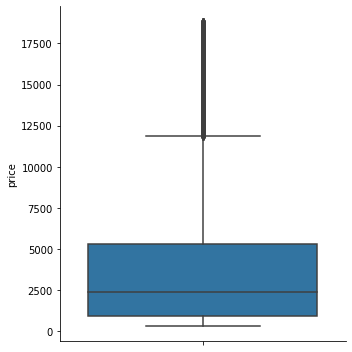

In [164]:
sns.catplot(y="price", kind="box", data=diamonds[["price"]])

もう少しみてみると、

In [165]:
diamonds["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

つまり、これを参考に「価格帯」を再定義してみましょう

In [171]:
diamonds.loc[(diamonds['price'] > 0) & (diamonds['price'] <= 950), 'price'] = int(1)
diamonds.loc[(diamonds['price'] > 950) & (diamonds['price'] <= 2401), 'price'] = int(2)
diamonds.loc[(diamonds['price'] > 2401) & (diamonds['price'] <= 5324), 'price'] = int(3)
diamonds.loc[(diamonds['price'] > 5324), 'price'] = int(4)

**これで、４つの価格帯ができた**

In [172]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,1,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,1,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,1,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,1,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,1,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,3,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,3,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,3,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,3,6.15,6.12,3.74


**このデータを使って、「価格帯」を分類するモデルでも作ってみよう**

In [173]:
diamonds_shuffle = diamonds.sample(frac=1)
diamonds_X = diamonds_shuffle[["carat", "cut", "color", "clarity", "depth", "table"]]
diamonds_y = diamonds_shuffle["price"]

In [174]:
# DataFrame型、Series型を、Numpyの配列に変換する
diamonds_X_array = diamonds_X.values
diamonds_y_array = diamonds_y.values

In [175]:
diamonds_X_train = diamonds_X_array[:40000]
diamonds_y_train = diamonds_y_array[:40000]
diamonds_X_test = diamonds_X_array[40000:]
diamonds_y_test = diamonds_y_array[40000:]

In [177]:
for i in diamonds_y_test:
    print(i)

2
2
2
3
1
2
3
1
3
2
1
2
1
4
1
2
2
4
2
4
2
2
4
4
3
3
4
2
4
1
3
2
4
4
1
3
4
3
3
2
2
3
3
4
2
2
2
1
3
3
4
3
4
1
4
2
2
1
2
3
2
3
4
2
4
3
2
3
1
2
1
3
1
4
1
2
3
1
1
1
4
1
3
4
2
4
2
4
3
3
4
2
2
1
3
1
4
4
2
4
2
4
4
3
3
3
4
3
4
3
4
4
3
1
1
4
1
2
3
2
4
3
4
1
3
2
1
4
3
1
1
2
4
1
4
1
1
2
3
4
3
1
2
4
3
4
4
4
4
4
4
4
1
1
2
1
4
3
2
1
1
2
4
3
1
4
4
1
3
2
4
3
1
1
1
2
1
4
2
1
3
3
4
1
2
4
4
3
3
1
1
1
1
2
3
3
4
2
3
1
1
2
1
4
3
4
2
1
3
2
3
1
1
1
4
2
3
2
2
4
4
2
4
2
3
4
3
2
2
1
2
2
4
2
3
1
4
2
1
1
2
4
1
4
2
3
2
3
4
1
1
1
4
3
2
4
4
2
4
1
4
3
4
3
3
3
4
1
1
1
2
3
4
3
3
4
3
1
2
1
2
1
4
4
3
2
3
2
4
1
3
2
1
3
1
4
4
3
2
3
4
4
1
2
2
4
3
4
1
2
1
1
3
1
3
2
3
3
2
2
1
3
1
1
1
1
3
4
3
3
2
3
4
3
3
2
3
2
3
1
4
2
4
2
1
2
4
1
1
1
4
3
3
2
2
4
1
2
4
4
2
4
2
3
4
4
4
3
3
4
2
1
1
2
3
4
3
1
2
1
2
4
4
2
4
2
2
4
2
1
2
1
3
3
1
2
4
4
2
1
3
2
2
1
2
3
1
2
2
1
4
1
4
4
3
2
4
4
1
4
4
3
3
4
3
4
1
4
4
1
3
2
2
3
4
1
1
4
3
2
2
1
2
2
1
2
3
1
1
3
2
1
3
1
3
2
4
2
2
4
2
3
3
2
2
4
2
4
3
4
3
1
2
3
4
3
3
1
3
4
2
2
2
4
3
3
4
3
4
3
1
4
4
1
1
2
3
1
3
1


2
2
1
1
4
1
4
1
4
3
2
3
4
2
4
3
2
2
4
1
3
3
1
4
4
2
4
4
1
2
2
2
4
1
2
2
4
4
2
1
4
1
4
2
4
3
2
4
1
1
3
2
3
4
3
4
1
1
1
1
4
1
4
4
3
2
3
3
3
1
2
1
4
2
1
4
1
4
1
1
4
1
4
1
4
1
1
1
3
4
1
1
1
4
2
1
4
1
3
2
3
2
3
3
1
2
1
3
3
3
2
2
1
3
3
2
4
1
3
3
4
2
1
4
4
4
2
4
1
1
3
1
3
2
3
3
2
3
3
3
1
2
2
3
4
4
3
3
4
2
1
4
4
3
3
1
2
2
1
1
4
2
3
1
2
3
3
2
2
2
1
3
3
2
3
3
3
3
2
2
4
1
3
2
1
2
3
1
2
1
4
2
3
2
3
1
4
3
4
1
3
1
2
1
2
4
4
2
1
4
2
1
3
3
4
3
2
2
1
2
1
4
3
1
3
1
1
4
4
4
1
4
4
4
1
3
1
4
4
3
4
2
3
1
1
4
3
2
3
3
4
2
1
2
2
2
1
4
3
1
3
1
4
1
3
2
2
1
3
4
1
2
2
1
4
3
1
4
4
2
1
3
3
3
3
1
1
2
1
4
2
3
2
1
1
3
3
4
1
4
4
3
3
2
4
1
2
3
4
1
3
2
1
2
4
1
1
4
3
2
4
2
2
2
3
4
4
4
3
3
1
2
1
3
1
3
3
2
3
3
2
1
4
2
3
4
2
1
4
2
1
2
2
2
2
4
1
3
2
2
2
4
1
4
4
4
1
1
2
1
1
1
2
2
2
4
1
2
1
4
4
1
1
3
3
1
3
2
2
2
1
4
2
3
2
2
2
1
2
2
4
2
2
1
3
2
3
3
3
4
4
1
3
2
4
2
3
3
4
4
3
2
3
1
1
1
4
4
1
4
1
2
2
2
1
3
1
1
3
4
1
4
2
4
2
4
2
2
4
3
3
1
4
4
2
2
4
4
3
1
4
4
2
4
3
3
3
4
1
1
1
2
4
2
1
1
1
4
3
1
1
2
1
3
3
4
2
3
4
2
3
3
2
1
3
4
4
4
3
4


3
2
3
1
2
4
4
3
3
1
4
2
2
2
2
2
4
4
3
2
1
2
4
4
4
4
4
3
1
2
1
3
1
3
1
4
3
1
1
1
4
2
4
2
2
4
2
3
4
4
4
3
3
1
1
4
1
4
4
3
3
1
1
1
1
2
2
2
1
2
4
3
1
2
3
3
3
1
3
1
2
1
1
2
3
1
4
1
3
3
2
1
4
3
3
4
1
1
2
1
4
2
4
2
3
2
2
2
2
1
1
3
3
3
4
1
3
4
2
2
3
4
2
4
4
4
2
4
3
3
2
1
2
1
3
1
2
3
1
3
3
2
2
4
4
2
3
4
3
1
4
3
2
3
3
3
1
4
4
4
3
1
1
3
1
4
2
3
1
3
1
3
3
1
2
1
2
2
3
1
3
2
2
3
4
3
2
4
3
4
4
3
4
3
3
3
2
2
3
2
4
3
3
1
1
3
1
1
2
3
2
2
2
4
4
1
2
1
2
1
2
1
2
1
1
3
3
3
1
1
1
1
3
3
3
2
3
2
3
2
4
3
3
2
3
1
1
2
1
3
2
2
3
3
4
3
2
3
2
3
3
2
2
2
2
4
2
1
2
1
1
1
4
3
1
3
4
1
4
2
2
2
3
1
4
2
2
3
2
4
1
1
3
2
4
1
2
1
3
3
4
3
4
2
1
4
3
3
3
3
3
3
1
2
3
3
1
1
4
2
2
3
4
1
1
2
3
3
3
2
4
4
2
3
2
4
2
4
3
1
3
2
1
2
3
1
2
4
2
4
3
4
1
1
1
4
3
4
3
2
4
3
1
4
2
3
3
1
1
4
2
4
3
2
3
1
1
3
3
2
2
4
4
4
2
1
2
4
2
1
3
3
2
4
3
3
2
4
1
1
3
3
1
4
2
1
3
2
1
3
4
1
3
1
4
4
3
4
4
1
3
4
1
2
2
2
2
2
1
1
3
4
1
2
2
1
1
1
2
1
2
2
3
1
4
4
2
3
1
3
2
2
4
4
4
1
4
2
3
3
1
3
2
2
1
3
4
3
1
4
4
4
4
3
4
4
4
4
3
4
2
3
4
4
3
2
2
3
4
4
2
2
2
3
4
2
3
2
4
1


In [178]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(diamonds_X_train, diamonds_y_train)

In [179]:
predicted = clf.predict(diamonds_X_test)

In [180]:
sum(predicted_next == diamonds_y_test) / len(diamonds_y_test)

0.18529411764705883

**な...なんだと！？~~ゴミカス~~ 全然ダメなモデルやんけ...！！！**  
ここで、よくよく見返して欲しい。
この正解ラベルは、「正解」ラベルなのでしょうか？？  
  
教師あり学習と言いながら、似非教師の正解ラベルでは？？？

### 教師なし学習として捉えてしまおう
分類問題の前に、クラスタリング問題として捉えてみよう。  
本来正解ラベルはないものとして、教師なしモデルで正解ラベルを作ってもらう

**ここでは、クラスタリング問題でよく扱われる、Kmeansを利用する**  
いったんすべてのデータを使って、クラスタリングしてみる

In [49]:
from sklearn.cluster import KMeans

In [50]:
cust_array = np.array([diamonds["carat"].tolist(),
                      diamonds["cut"].tolist(),
                      diamonds["color"].tolist(),
                      diamonds["clarity"].tolist(),
                      diamonds["depth"].tolist(),
                      diamonds["table"].tolist()
                      ],np.float16)

Numpy配列に変換しています

In [51]:
cust_array

array([[ 0.23,  0.21,  0.23, ...,  0.7 ,  0.86,  0.75],
       [ 5.  ,  4.  ,  2.  , ...,  3.  ,  4.  ,  5.  ],
       [ 6.  ,  6.  ,  6.  , ...,  7.  ,  3.  ,  7.  ],
       [ 2.  ,  3.  ,  5.  , ...,  3.  ,  2.  ,  2.  ],
       [61.5 , 59.8 , 56.9 , ..., 62.8 , 61.  , 62.2 ],
       [55.  , 61.  , 65.  , ..., 60.  , 58.  , 55.  ]], dtype=float16)

In [52]:
# 転置(行と列を入れ替え)
cust_array.T

array([[ 0.23,  5.  ,  6.  ,  2.  , 61.5 , 55.  ],
       [ 0.21,  4.  ,  6.  ,  3.  , 59.8 , 61.  ],
       [ 0.23,  2.  ,  6.  ,  5.  , 56.9 , 65.  ],
       ...,
       [ 0.7 ,  3.  ,  7.  ,  3.  , 62.8 , 60.  ],
       [ 0.86,  4.  ,  3.  ,  2.  , 61.  , 58.  ],
       [ 0.75,  5.  ,  7.  ,  2.  , 62.2 , 55.  ]], dtype=float16)

いったん、"price", "x", "y", "z"をあえて除いてます

In [53]:
diamonds_without_price_xyz = diamonds.drop(columns=['price','x','y','z'])

In [54]:
diamonds_without_price_xyz

,carat,cut,color,clarity,depth,table
0,0.23,5,6,2,61.5,55.0
1,0.21,4,6,3,59.8,61.0
2,0.23,2,6,5,56.9,65.0
3,0.29,4,2,4,62.4,58.0
4,0.31,2,1,2,63.3,58.0
...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0
53936,0.72,2,7,3,63.1,55.0
53937,0.70,3,7,3,62.8,60.0
53938,0.86,4,3,2,61.0,58.0


**Kmeanモデルを構築する、前処理としてNormalize(標準化)しています**

In [55]:
# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clustering_sc = sc.fit_transform(diamonds_without_price_xyz)

In [56]:
# Kmeanのモデルへの適用
kmeans_model = KMeans(n_clusters=5).fit_predict(clustering_sc)

In [57]:
len(kmeans_model), type(kmeans_model)

(53940, numpy.ndarray)

In [58]:
# クラスタリング結果のラベルを取得する
kmeans_model

array([4, 1, 1, ..., 2, 3, 4], dtype=int32)

In [59]:
clust_result_list = []
clust_result_list += [ i for i in kmeans_model]

**クラスタの結果**

In [60]:
clust_result_list

[4,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 4,
 1,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 4,
 4,
 0,
 2,
 1,
 2,
 4,
 2,
 2,
 2,
 1,
 1,
 0,
 4,
 4,
 1,
 4,
 1,
 2,
 2,
 2,
 0,
 4,
 4,
 4,
 3,
 0,
 0,
 2,
 4,
 0,
 1,
 2,
 2,
 4,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 2,
 4,
 1,
 4,
 2,
 2,
 1,
 1,
 2,
 1,
 3,
 2,
 4,
 4,
 4,
 0,
 4,
 2,
 0,
 4,
 0,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 4,
 2,
 4,
 2,
 1,
 0,
 1,
 0,
 3,
 0,
 4,
 4,
 4,
 1,
 4,
 1,
 2,
 4,
 1,
 4,
 4,
 3,
 4,
 1,
 2,
 4,
 4,
 1,
 0,
 4,
 1,
 0,
 1,
 4,
 4,
 0,
 4,
 0,
 0,
 1,
 4,
 1,
 3,
 4,
 4,
 2,
 1,
 2,
 4,
 4,
 0,
 0,
 4,
 4,
 1,
 4,
 2,
 4,
 2,
 2,
 1,
 4,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 4,
 4,
 2,
 2,
 4,
 2,
 0,
 3,
 4,
 2,
 4,
 4,
 0,
 0,
 1,
 4,
 4,
 1,
 1,
 4,
 1,
 4,
 2,
 4,
 4,
 4,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 4,
 1,
 1,
 0,
 2,
 1,
 4,
 2,
 3,
 2,
 2,
 4,
 4,
 3,
 4,
 4,


**この結果を、列として追加する**

In [61]:
diamonds_without_price_xyz['cluster'] = clust_result_list

In [62]:
diamonds_without_price_xyz

,carat,cut,color,clarity,depth,table,cluster
0,0.23,5,6,2,61.5,55.0,4
1,0.21,4,6,3,59.8,61.0,1
2,0.23,2,6,5,56.9,65.0,1
3,0.29,4,2,4,62.4,58.0,0
4,0.31,2,1,2,63.3,58.0,2
...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,4
53936,0.72,2,7,3,63.1,55.0,2
53937,0.70,3,7,3,62.8,60.0,2
53938,0.86,4,3,2,61.0,58.0,3


In [63]:
# 次元削除
from sklearn.decomposition import PCA
 
x = clustering_sc
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = diamonds_without_price_xyz['cluster']

**クラスタ結果を、可視化してみた**

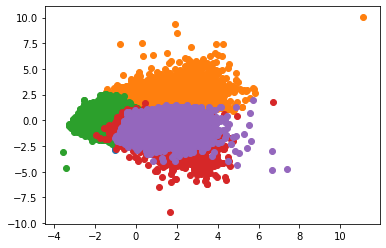

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
 
for i in diamonds_without_price_xyz['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])

かなり混ざり合っていて、きちんとクラスタに分けられていないことがわかる...

### "price" を階層別に、
**例えば値段を一つの評価基準、判断基準にできないだろうか**

In [65]:
diamonds_without_xyz = diamonds.drop(columns=['x','y','z'])

In [66]:
diamonds_without_xyz

,carat,cut,color,clarity,depth,table,price
0,0.23,5,6,2,61.5,55.0,326
1,0.21,4,6,3,59.8,61.0,326
2,0.23,2,6,5,56.9,65.0,327
3,0.29,4,2,4,62.4,58.0,334
4,0.31,2,1,2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757
53936,0.72,2,7,3,63.1,55.0,2757
53937,0.70,3,7,3,62.8,60.0,2757
53938,0.86,4,3,2,61.0,58.0,2757


In [67]:
# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clustering_sc = sc.fit_transform(diamonds_without_xyz)

In [68]:
kmeans_model = KMeans(n_clusters=5).fit_predict(clustering_sc)

In [69]:
clust_result_list_with_price = []
clust_result_list_with_price += [ i for i in kmeans_model]

In [70]:
diamonds_without_xyz['cluster'] = clust_result_list_with_price

In [71]:
diamonds_without_xyz

,carat,cut,color,clarity,depth,table,price,cluster
0,0.23,5,6,2,61.5,55.0,326,2
1,0.21,4,6,3,59.8,61.0,326,0
2,0.23,2,6,5,56.9,65.0,327,0
3,0.29,4,2,4,62.4,58.0,334,4
4,0.31,2,1,2,63.3,58.0,335,3
...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,2
53936,0.72,2,7,3,63.1,55.0,2757,3
53937,0.70,3,7,3,62.8,60.0,2757,3
53938,0.86,4,3,2,61.0,58.0,2757,0


In [72]:
# 次元削除
from sklearn.decomposition import PCA
 
x = clustering_sc
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = diamonds_without_xyz['cluster']

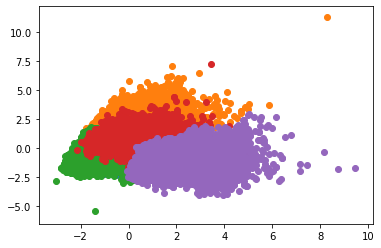

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
 
for i in diamonds_without_xyz['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])

**うまい具合に分離してくれないので、まだ特徴量をきちんと捉えていない**  
そういえば...  
"carat", "price", "x", "y", "z"は、強い正の相関がありましたよね？(確信

In [74]:
diamonds_without_3c_d_t = diamonds.drop(columns=['cut','color','clarity','depth','table'])

In [75]:
diamonds_without_3c_d_t

,carat,price,x,y,z
0,0.23,326,3.95,3.98,2.43
1,0.21,326,3.89,3.84,2.31
2,0.23,327,4.05,4.07,2.31
3,0.29,334,4.20,4.23,2.63
4,0.31,335,4.34,4.35,2.75
...,...,...,...,...,...
53935,0.72,2757,5.75,5.76,3.50
53936,0.72,2757,5.69,5.75,3.61
53937,0.70,2757,5.66,5.68,3.56
53938,0.86,2757,6.15,6.12,3.74


In [76]:
# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clustering_sc = sc.fit_transform(diamonds_without_3c_d_t)

In [77]:
kmeans_model = KMeans(n_clusters=5).fit_predict(clustering_sc)

In [78]:
clust_result_list_without_3c_d_t = []
clust_result_list_without_3c_d_t += [ i for i in kmeans_model]

In [79]:
diamonds_without_3c_d_t['cluster'] = clust_result_list_without_3c_d_t

In [80]:
# 次元削除
from sklearn.decomposition import PCA
 
x = clustering_sc
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = diamonds_without_3c_d_t['cluster']

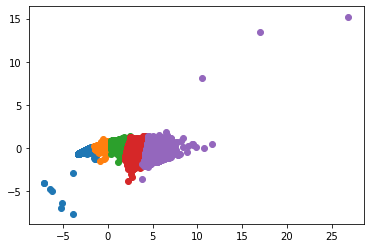

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
 
for i in diamonds_without_3c_d_t['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])

ふむ、わりかし綺麗に、クラスタに分けれた気がします。

**いったん、このクラスタリングの結果を使ってみる**  
'carat', 'price', 'x', 'y', 'z'は、それぞれ相関係数が非常に大きいため(>0.85)、このクラスタリングのラベルを  
'cut', 'color', 'clarity', 'depth', 'table'に利用できないかを考える  
  
値段とクラスタの内容を確認してみたい

In [82]:
for i in range(10000):
    print(diamonds_without_3c_d_t['carat'][i],
          diamonds_without_3c_d_t['price'][i],
          diamonds_without_3c_d_t['cluster'][i])

0.23 326 3
0.21 326 3
0.23 327 3
0.29 334 3
0.31 335 3
0.24 336 3
0.24 336 3
0.26 337 3
0.22 337 3
0.23 338 3
0.3 339 3
0.23 340 3
0.22 342 3
0.31 344 3
0.2 345 3
0.32 345 3
0.3 348 3
0.3 351 3
0.3 351 3
0.3 351 3
0.3 351 3
0.23 352 3
0.23 353 3
0.31 353 3
0.31 353 3
0.23 354 3
0.24 355 3
0.3 357 3
0.23 357 3
0.23 357 3
0.23 402 3
0.23 402 3
0.23 402 3
0.23 402 3
0.23 402 3
0.23 402 3
0.23 402 3
0.31 402 3
0.26 403 3
0.33 403 3
0.33 403 3
0.33 403 3
0.26 403 3
0.26 403 3
0.32 403 3
0.29 403 3
0.32 403 3
0.32 403 3
0.25 404 3
0.29 404 3
0.24 404 3
0.23 404 3
0.32 404 3
0.22 404 3
0.22 404 3
0.3 405 3
0.3 405 3
0.3 405 3
0.3 405 3
0.3 405 3
0.35 552 3
0.3 552 3
0.3 552 3
0.3 552 3
0.42 552 3
0.28 553 3
0.32 553 3
0.31 553 3
0.31 553 3
0.24 553 3
0.24 553 3
0.3 554 3
0.3 554 3
0.3 554 3
0.3 554 3
0.26 554 3
0.26 554 3
0.26 554 3
0.26 554 3
0.26 554 3
0.26 554 3
0.26 554 3
0.26 554 3
0.38 554 3
0.26 554 3
0.24 554 3
0.24 554 3
0.24 554 3
0.24 554 3
0.32 554 3
0.7 2757 1
0.86 2757 0
0.7 275

1.01 2862 0
0.73 2862 1
0.91 2863 0
0.71 2863 1
0.83 2863 1
0.84 2863 0
0.71 2863 1
0.71 2863 1
0.71 2863 1
0.71 2863 1
0.71 2863 1
0.71 2863 1
0.91 2863 0
0.9 2863 0
0.71 2863 1
0.71 2863 1
0.72 2863 1
0.72 2863 1
0.71 2863 1
0.81 2864 1
0.83 2865 1
0.73 2865 1
0.56 2866 1
0.56 2866 1
0.71 2866 1
0.7 2866 1
0.96 2866 0
0.71 2867 1
0.7 2867 1
0.71 2867 1
0.8 2867 1
0.95 2867 0
0.82 2867 1
0.52 2867 1
0.82 2867 1
0.82 2867 1
0.82 2867 1
0.8 2867 1
0.96 2867 0
0.72 2868 1
0.62 2868 1
0.79 2868 1
0.75 2868 1
1.08 2869 0
0.72 2869 1
0.62 2869 1
0.73 2869 1
0.72 2869 1
0.52 2870 1
0.83 2870 1
0.64 2870 1
0.8 2870 1
0.74 2870 1
0.72 2870 1
0.82 2870 1
0.73 2870 1
1.04 2870 0
0.73 2871 1
0.73 2871 1
0.9 2871 0
0.75 2871 1
0.79 2871 1
0.7 2872 1
0.75 2872 1
1.02 2872 0
0.7 2872 1
0.7 2872 1
0.7 2872 1
0.7 2872 1
0.7 2872 1
0.7 2872 1
0.72 2872 1
0.74 2872 1
0.84 2872 1
0.76 2873 1
0.77 2873 1
0.76 2873 1
1.0 2873 0
1.0 2873 0
0.9 2873 0
0.9 2873 0
0.9 2873 0
0.9 2873 0
0.9 2873 0
0.9 2873 0
0.

0.72 3002 1
0.8 3002 1
0.73 3002 1
0.76 3003 1
1.01 3003 0
0.65 3003 1
0.81 3004 1
0.81 3004 1
0.7 3004 1
0.61 3004 1
0.78 3004 1
0.72 3004 1
0.92 3004 0
0.75 3005 1
0.55 3005 1
0.8 3005 1
0.72 3005 1
0.73 3005 1
0.91 3006 0
0.91 3006 0
0.71 3006 1
0.71 3006 1
0.55 3006 1
0.71 3007 1
0.71 3007 1
0.7 3007 1
0.71 3007 1
0.71 3007 1
0.71 3007 1
0.71 3007 1
0.71 3007 1
0.76 3007 1
0.91 3007 0
0.7 3008 1
0.61 3008 1
0.7 3008 1
0.82 3008 1
0.71 3009 1
0.71 3009 1
0.71 3009 1
0.74 3009 1
0.83 3010 1
0.83 3010 1
0.8 3010 1
0.8 3011 1
0.73 3011 1
1.0 3011 0
1.2 3011 0
1.2 3011 0
1.2 3011 0
0.61 3011 1
0.7 3011 1
0.7 3011 1
0.7 3011 1
0.7 3011 1
0.77 3011 1
0.75 3011 1
0.75 3011 1
1.0 3011 0
0.78 3012 1
0.82 3012 1
0.72 3012 1
0.72 3012 1
0.72 3012 1
0.8 3013 1
0.75 3013 1
0.71 3013 1
0.71 3013 1
0.81 3013 1
0.81 3013 1
0.9 3013 0
0.78 3014 1
0.71 3014 1
0.73 3014 1
1.01 3014 0
0.9 3014 0
0.84 3015 0
0.91 3015 0
0.78 3015 1
0.81 3015 1
0.72 3016 1
0.7 3016 1
0.7 3016 1
0.9 3016 0
0.76 3016 1
0.9

0.71 3192 1
0.75 3192 1
0.71 3192 1
0.71 3192 1
0.81 3192 1
0.76 3192 1
0.91 3192 0
1.0 3192 0
0.76 3192 1
1.0 3192 0
0.81 3193 1
0.73 3193 1
0.9 3193 0
0.7 3193 1
0.81 3193 1
0.9 3193 0
0.54 3194 1
0.83 3195 1
0.73 3195 1
0.71 3195 1
0.8 3195 1
0.83 3195 1
0.91 3195 0
0.91 3195 0
0.6 3196 1
0.9 3196 0
0.91 3196 0
0.9 3197 0
0.51 3197 1
0.77 3197 1
1.01 3197 0
0.83 3198 1
0.73 3198 1
0.71 3198 1
0.71 3198 1
0.83 3198 0
0.7 3199 1
1.0 3199 0
0.71 3199 1
0.71 3199 1
1.02 3199 0
0.7 3199 1
0.7 3199 1
1.02 3199 0
0.73 3200 1
0.74 3200 1
0.9 3200 0
0.9 3201 0
0.7 3201 1
0.7 3201 1
0.73 3201 1
0.84 3201 0
0.76 3201 1
0.71 3203 1
1.04 3203 0
1.04 3203 0
0.7 3204 1
0.7 3204 1
1.02 3204 0
1.04 3204 0
0.7 3205 1
1.11 3205 0
0.7 3205 1
0.7 3205 1
0.71 3205 1
0.9 3205 0
0.9 3205 0
0.9 3205 0
0.9 3205 0
0.9 3205 0
0.9 3205 0
0.9 3205 0
0.72 3205 1
0.75 3206 1
0.75 3206 1
0.75 3206 1
0.58 3206 1
0.7 3206 1
0.7 3206 1
0.7 3206 1
0.83 3207 1
0.83 3207 1
1.01 3207 0
0.77 3208 1
0.7 3208 1
0.7 3208 1
0.

0.9 3371 0
0.9 3371 0
0.71 3371 1
0.71 3371 1
0.9 3371 0
0.86 3372 0
0.87 3372 0
0.76 3372 1
0.71 3372 1
0.82 3373 1
0.52 3373 1
0.81 3373 1
0.72 3374 1
0.74 3374 1
0.7 3375 1
0.72 3375 1
0.9 3375 0
1.23 3375 0
0.71 3376 1
0.93 3376 0
0.91 3376 0
0.7 3376 1
0.71 3376 1
0.91 3376 0
1.01 3377 0
0.79 3377 1
0.92 3377 0
0.9 3377 0
0.7 3377 1
0.9 3377 0
0.9 3377 0
0.5 3378 1
0.5 3378 1
1.03 3378 0
0.73 3378 1
0.62 3378 1
0.95 3378 0
0.91 3379 0
0.91 3379 0
0.91 3379 0
0.82 3380 1
0.7 3380 1
0.71 3380 1
0.71 3380 1
0.8 3381 1
0.71 3381 1
0.92 3382 0
0.91 3382 0
0.6 3382 1
0.3 405 3
0.3 405 3
0.31 406 3
0.3 407 3
0.3 407 3
0.25 407 3
0.25 407 3
0.27 407 3
0.27 407 3
0.3 407 3
0.3 407 3
0.32 407 3
0.3 407 3
0.3 407 3
0.25 407 3
0.24 408 3
0.3 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.31 408 3
0.34 566 3
0.27 567 3
0.27 567 3
0.35 567 3
0.27 567 3
0.32 567 3
0.32 567 3
0.3 567 3
0.3 567 3
0.3 567 3

1.2 3570 0
0.74 3572 1
1.19 3572 0
0.91 3573 0
1.16 3573 0
1.1 3573 0
0.9 3574 0
0.9 3574 0
0.91 3574 0
1.15 3574 0
1.0 3575 0
1.0 3575 0
0.93 3576 0
0.71 3576 1
0.76 3577 1
0.82 3577 1
0.9 3577 0
0.84 3577 0
1.01 3577 0
0.82 3577 1
0.9 3578 0
0.9 3578 0
0.8 3578 1
0.78 3578 1
0.71 3578 1
0.91 3579 0
0.91 3579 0
1.06 3579 0
0.9 3579 0
0.71 3580 1
0.9 3580 0
0.9 3580 0
0.9 3580 0
1.0 3580 0
0.9 3581 0
0.76 3581 1
0.9 3581 0
0.9 3581 0
0.78 3581 1
1.04 3581 0
0.8 3581 1
1.02 3581 0
0.78 3582 1
0.71 3582 1
0.71 3583 1
0.79 3583 1
0.98 3583 0
0.9 3584 0
1.0 3584 0
0.76 3584 1
0.9 3584 0
0.8 3584 1
1.0 3584 0
1.0 3584 0
1.0 3584 0
1.0 3584 0
1.0 3584 0
1.0 3584 0
1.0 3584 0
0.7 3585 1
0.7 3585 1
0.97 3585 0
0.92 3586 0
0.9 3587 0
0.7 3587 1
1.04 3588 0
0.91 3588 0
0.82 3588 1
1.11 3589 0
0.73 3589 1
0.95 3590 0
0.78 3590 1
0.74 3590 1
1.08 3590 0
0.7 3591 1
0.84 3591 0
1.01 3592 0
1.01 3592 0
0.9 3593 0
0.82 3593 0
0.99 3593 0
1.05 3593 0
0.74 3593 1
0.93 3594 0
0.9 3595 0
0.9 3595 0
1.07 3

0.4 573 3
0.4 573 3
0.4 573 3
0.4 573 3
0.31 573 3
0.31 573 3
0.31 573 3
0.31 573 3
0.31 573 3
0.31 573 3
0.31 573 3
0.31 573 3
0.31 573 3
0.31 573 3
0.3 574 3
0.31 574 3
0.31 574 3
0.34 574 3
0.34 574 3
0.34 574 3
0.34 574 3
0.34 574 3
0.3 574 3
0.3 574 3
0.3 574 3
0.3 574 3
0.3 574 3
0.3 574 3
0.77 3750 1
0.95 3750 0
0.9 3750 0
0.93 3750 0
0.9 3750 0
1.01 3750 0
0.93 3750 0
0.91 3751 0
1.25 3751 0
0.92 3751 0
0.91 3751 0
0.9 3751 0
0.9 3752 0
0.9 3752 0
0.7 3752 1
0.9 3752 0
1.0 3752 0
1.0 3752 0
1.06 3754 0
1.02 3754 0
1.02 3754 0
0.9 3755 0
0.9 3755 0
1.14 3755 0
1.03 3755 0
1.02 3755 0
0.77 3755 1
0.91 3756 0
0.91 3756 0
0.81 3756 1
1.01 3756 0
0.86 3756 0
0.73 3758 1
0.94 3758 0
0.61 3758 1
0.72 3759 1
0.72 3759 1
0.72 3759 1
0.72 3759 1
0.72 3759 1
0.72 3759 1
0.72 3759 1
0.72 3759 1
0.72 3759 1
0.71 3760 1
0.79 3760 1
1.09 3760 0
0.74 3760 1
1.01 3761 0
0.72 3762 1
0.91 3762 0
1.04 3762 0
0.92 3763 0
0.91 3763 0
0.91 3763 0
0.7 3763 1
0.78 3763 1
0.92 3763 0
0.91 3763 0
0.91 37

0.9 3918 0
0.95 3918 0
1.1 3918 0
1.0 3918 0
0.9 3919 0
0.9 3919 0
0.9 3919 0
0.9 3919 0
1.0 3920 0
1.01 3920 0
0.92 3920 0
1.0 3920 0
1.0 3920 0
1.0 3920 0
1.0 3920 0
1.0 3920 0
1.0 3920 0
1.0 3920 0
1.0 3920 0
1.0 3920 0
1.0 3920 0
0.7 3920 1
1.0 3920 0
0.51 3920 1
0.91 3921 0
0.91 3921 0
1.03 3921 0
0.9 3921 0
0.88 3921 0
0.74 3922 1
1.03 3922 0
0.78 3923 1
1.01 3923 0
0.81 3923 0
1.01 3923 0
0.92 3924 0
0.91 3924 0
0.9 3924 0
0.85 3924 0
0.9 3924 0
1.04 3924 0
0.91 3924 0
0.91 3924 0
1.03 3925 0
1.18 3925 0
1.01 3926 0
1.01 3926 0
1.02 3927 0
1.02 3927 0
1.02 3927 0
1.02 3927 0
0.76 3927 1
1.01 3928 0
1.03 3929 0
1.0 3929 0
0.8 3930 0
0.9 3931 0
0.9 3931 0
0.9 3931 0
0.9 3931 0
0.9 3931 0
1.04 3931 0
0.9 3931 0
0.9 3931 0
1.08 3931 0
1.2 3931 0
1.01 3932 0
0.92 3932 0
1.06 3932 0
0.9 3933 0
0.93 3933 0
0.83 3933 0
0.9 3933 0
0.81 3933 1
0.81 3935 0
1.06 3936 0
0.91 3936 0
0.91 3936 0
0.9 3936 0
0.84 3936 0
0.92 3936 0
1.02 3936 0
0.71 3936 1
0.73 3937 1
0.93 3937 0
0.94 3938 0
1.02

1.01 4072 0
1.01 4072 0
0.93 4073 0
1.11 4073 0
0.9 4074 0
0.99 4075 0
1.07 4075 0
1.11 4075 0
1.0 4077 0
0.91 4077 0
0.92 4077 0
1.01 4077 0
1.0 4077 0
0.9 4077 0
1.0 4077 0
1.12 4077 0
1.0 4077 0
1.0 4077 0
1.0 4077 0
1.12 4077 0
1.0 4077 0
1.04 4077 0
1.04 4077 0
1.12 4077 0
1.0 4077 0
1.0 4077 0
1.0 4077 0
0.9 4078 0
0.9 4078 0
0.9 4078 0
1.03 4078 0
1.03 4078 0
1.03 4078 0
1.09 4078 0
1.01 4078 0
1.01 4078 0
0.97 4078 0
1.06 4078 0
1.02 4078 0
1.19 4078 0
1.01 4079 0
1.01 4079 0
0.9 4079 0
1.0 4080 0
0.91 4081 0
0.9 4081 0
1.0 4081 0
1.0 4081 0
1.0 4081 0
1.0 4081 0
1.0 4081 0
1.0 4081 0
0.93 4081 0
0.93 4081 0
0.91 4081 0
1.0 4081 0
0.9 4082 0
1.0 4082 0
0.74 4082 1
0.72 4082 1
0.72 4082 1
0.9 4082 0
0.9 4082 0
0.9 4082 0
0.9 4082 0
0.9 4082 0
0.9 4082 0
1.35 4082 0
1.1 4083 0
1.12 4084 0
1.04 4084 0
1.02 4084 0
0.64 4084 1
1.1 4084 0
1.11 4084 0
1.28 4086 0
0.8 4086 1
0.92 4086 0
1.0 4086 0
0.81 4087 0
1.0 4088 0
1.0 4088 0
0.9 4088 0
1.0 4088 0
1.0 4088 0
0.9 4089 0
1.01 4089 0

0.9 4234 0
0.9 4234 0
0.9 4234 0
1.0 4234 0
1.2 4234 0
1.0 4234 0
1.0 4234 0
0.71 4234 1
1.2 4234 0
1.2 4234 0
1.0 4234 0
1.1 4235 0
1.07 4235 0
1.07 4235 0
1.07 4237 0
1.0 4237 0
1.02 4238 0
0.91 4238 0
1.06 4238 0
1.02 4238 0
1.02 4238 0
1.02 4238 0
1.02 4238 0
1.02 4238 0
1.06 4238 0
1.02 4238 0
1.02 4238 0
1.01 4239 0
1.01 4239 0
1.01 4239 0
1.01 4239 0
0.91 4239 0
0.9 4239 0
1.04 4240 0
0.7 4240 1
0.79 4240 1
0.91 4240 0
1.04 4240 0
1.04 4240 0
1.05 4241 0
1.08 4241 0
1.05 4241 0
1.08 4241 0
1.02 4241 0
1.05 4241 0
1.05 4241 0
0.9 4241 0
0.61 4241 1
1.01 4241 0
0.9 4241 0
0.91 4241 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
1.01 4242 0
0.84 4243 0
1.01 4243 0
0.76 4243 1
1.02 4243 0
0.92 4243 0
0.7 4244 1
1.04 4244 0
1.09 4244 0
1.01 4244 0
1.01 4244 0
1.1 4244 0
1.01 4244 0
1.02 4246 0
0.7 4246 1
0.9 4246 0
0.92 4247 0
0.96 4247 0
1.03 4248 0


1.13 4385 0
0.9 4385 0
0.9 4385 0
0.9 4386 0
0.9 4386 0
0.91 4386 0
1.0 4386 0
1.2 4387 0
1.44 4387 0
0.93 4387 0
0.8 4388 0
0.96 4388 0
1.0 4389 0
1.0 4389 0
1.0 4389 0
1.0 4389 0
1.0 4389 0
1.0 4389 0
0.91 4389 0
1.0 4390 0
1.1 4390 0
0.9 4390 0
1.0 4390 0
1.12 4390 0
1.0 4390 0
1.0 4390 0
1.13 4391 0
1.03 4391 0
1.08 4391 0
1.21 4391 0
1.21 4391 0
0.91 4392 0
1.0 4392 0
1.0 4394 0
1.09 4395 0
1.09 4395 0
1.16 4395 0
1.0 4395 0
1.03 4395 0
0.9 4395 0
1.01 4395 0
1.01 4395 0
0.9 4397 0
1.02 4397 0
1.02 4397 0
1.01 4397 0
1.02 4398 0
1.02 4398 0
1.02 4398 0
1.02 4398 0
1.02 4398 0
1.02 4398 0
1.02 4398 0
1.02 4398 0
1.05 4398 0
1.04 4398 0
1.02 4398 0
1.0 4398 0
1.02 4398 0
1.02 4398 0
1.02 4398 0
1.02 4398 0
0.77 4399 1
1.01 4399 0
1.01 4399 0
1.01 4399 0
1.01 4399 0
1.01 4399 0
1.14 4399 0
0.9 4400 0
0.9 4400 0
0.9 4400 0
1.0 4400 0
0.97 4400 0
0.31 583 3
0.31 583 3
0.31 583 3
0.31 583 3
0.31 583 3
0.31 583 3
0.31 583 3
0.31 583 3
0.31 583 3
0.31 583 3
0.31 583 3
0.35 583 3
0.35 583 

1.06 4568 0
1.0 4568 0
1.0 4569 0
1.12 4570 0
0.79 4570 1
1.06 4570 0
1.45 4570 2
0.91 4570 0
1.02 4570 0
1.06 4571 0
1.06 4571 0
1.12 4572 0
1.15 4572 0
1.0 4573 0
1.32 4573 0
1.03 4573 0
1.07 4573 0
1.0 4574 0
1.01 4574 0
1.21 4574 0
0.94 4575 0
1.01 4575 0
1.0 4576 0
1.12 4576 0
1.02 4578 0
1.06 4578 0
1.11 4578 0
1.11 4578 0
1.11 4578 0
1.11 4578 0
1.09 4578 0
1.09 4578 0
1.01 4578 0
0.9 4579 0
0.9 4579 0
1.18 4579 0
1.03 4579 0
0.9 4579 0
1.0 4579 0
1.0 4579 0
1.27 4580 0
0.9 4580 0
0.9 4580 0
0.9 4580 0
0.9 4580 0
0.9 4580 0
1.2 4580 0
1.03 4580 0
1.0 4580 0
0.94 4580 0
0.94 4580 0
0.94 4580 0
1.11 4581 0
1.01 4581 0
1.0 4581 0
1.03 4582 0
1.03 4582 0
1.24 4583 0
1.02 4583 0
1.02 4583 0
1.09 4584 0
1.11 4584 0
0.9 4584 0
1.13 4584 0
1.01 4584 0
1.07 4584 0
1.03 4585 0
1.02 4585 0
1.09 4586 0
1.09 4586 0
1.16 4586 0
1.0 4586 0
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.32 589 3
0.

**なんとなく、同じ値段でも別々のクラスタになっていることが確認できる**  
これは、"cut", "carat", "clarity", "depth", "table"が関係しているのだろうか？  
  
巷では、"cut", "carat", "clarity"、いわゆる"3C"というものが重要みたい。  
したがって、この3Cに、先ほどのクラスタリングのラベル結果を追加してみる。

In [88]:
diamonds_new = diamonds.drop(columns=['depth', 'table', 'x', 'y', 'z'])

In [89]:
diamonds_new['cluster'] = clust_result_list_without_3c_d_t

In [90]:
diamonds_new

,carat,cut,color,clarity,price,cluster
0,0.23,5,6,2,326,3
1,0.21,4,6,3,326,3
2,0.23,2,6,5,327,3
3,0.29,4,2,4,334,3
4,0.31,2,1,2,335,3
...,...,...,...,...,...,...
53935,0.72,5,7,3,2757,1
53936,0.72,2,7,3,2757,1
53937,0.70,3,7,3,2757,1
53938,0.86,4,3,2,2757,0


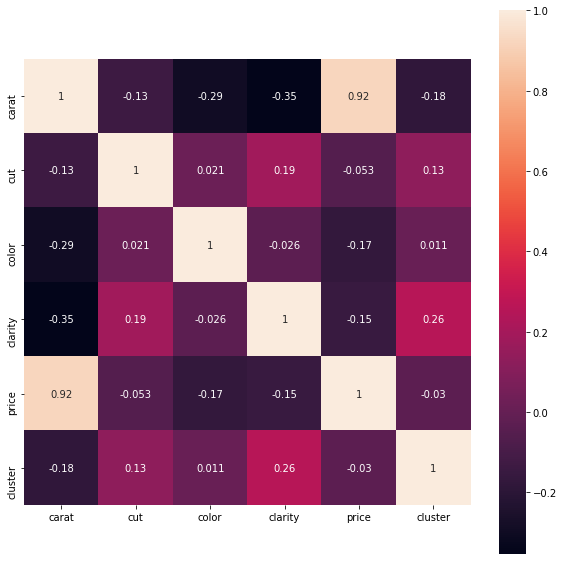

In [91]:
corr = diamonds_new.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)

### データの件数が多いため、念の為、データをシャッフルしてから
**説明変数に、"carat", "cut", "color", "clarity", "price" **  
**目的変数に、"cluster" としてみる**

In [95]:
diamonds_shuffle = diamonds_new.sample(frac=1)
diamonds_X = diamonds_shuffle[["carat", "cut", "color", "clarity", "price"]]
diamonds_y = diamonds_shuffle["cluster"]

In [96]:
diamonds_X

,carat,cut,color,clarity,price
10818,1.00,3,7,2,4867
1671,0.70,3,4,4,3026
25690,0.38,3,5,2,644
37109,0.38,5,4,3,969
43691,0.50,2,5,4,1436
...,...,...,...,...,...
39641,0.41,5,6,6,1085
1987,0.94,4,5,2,3095
42508,0.50,5,2,6,1322
13384,0.31,5,6,3,601


In [101]:
diamonds_y

10818    0
1671     1
25690    3
37109    3
43691    1
        ..
39641    3
1987     0
42508    1
13384    3
53536    1
Name: cluster, Length: 53940, dtype: int64

In [150]:
# DataFrame型、Series型を、Numpyの配列に変換する
diamonds_X_array = diamonds_X.values
diamonds_y_array = diamonds_y.values

分類問題なので、しかもラベルのある教師あり学習でもあるので、  
学習データと検証データに分けて、モデルも作ってみる

In [99]:
diamonds_X_train = diamonds_X_array[:40000]
diamonds_y_train = diamonds_y_array[:40000]
diamonds_X_test = diamonds_X_array[40000:]
diamonds_y_test = diamonds_y_array[40000:]

In [102]:
diamonds_X_train

array([[1.0000e+00, 3.0000e+00, 7.0000e+00, 2.0000e+00, 4.8670e+03],
       [7.0000e-01, 3.0000e+00, 4.0000e+00, 4.0000e+00, 3.0260e+03],
       [3.8000e-01, 3.0000e+00, 5.0000e+00, 2.0000e+00, 6.4400e+02],
       ...,
       [5.9000e-01, 5.0000e+00, 4.0000e+00, 5.0000e+00, 2.0180e+03],
       [2.1000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00, 1.8462e+04],
       [5.2000e-01, 5.0000e+00, 5.0000e+00, 4.0000e+00, 1.8060e+03]])

In [103]:
diamonds_y_train

array([0, 1, 3, ..., 1, 4, 1])

In [104]:
print(len(diamonds_X_train), type(diamonds_X_train))
print(len(diamonds_y_train), type(diamonds_y_train))
print(len(diamonds_X_test), type(diamonds_X_test))
print(len(diamonds_y_test), type(diamonds_y_test))

40000 <class 'numpy.ndarray'>
40000 <class 'numpy.ndarray'>
13940 <class 'numpy.ndarray'>
13940 <class 'numpy.ndarray'>


In [105]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(diamonds_X_train, diamonds_y_train)

In [106]:
predicted = clf.predict(diamonds_X_test)

**予測結果と、本来の正解データとを比較して精度を確認**

In [107]:
sum(predicted == diamonds_y_test) / len(diamonds_y_test)

0.9235294117647059

**どの様に分類されたかを確認したい**

In [120]:
tree.export_graphviz(clf, out_file="tree.dot",
                     feature_names=diamonds_X.columns,
                     class_names=diamonds_y.name,
                     filled=True, rounded=True)

In [121]:
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
 
# PDFファイルに出力
graph.write_pdf("graph.pdf")

True

結果は、PDFを見てみる  
ちょっと階層が浅かった？ 階層を、３→５にしてみる

In [123]:
clf_next = tree.DecisionTreeClassifier(max_depth=5)
clf_next = clf_next.fit(diamonds_X_train, diamonds_y_train)

In [124]:
clf_next

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [125]:
predicted_next = clf_next.predict(diamonds_X_test)

In [126]:
sum(predicted_next == diamonds_y_test) / len(diamonds_y_test)

0.9808464849354376

**精度は、0.923...から0.981...になり、おおよそ6%向上**

In [127]:
tree.export_graphviz(clf_next, out_file="tree_next.dot",
                     feature_names=diamonds_X.columns,
                     class_names=diamonds_y.name,
                     filled=True, rounded=True)

In [128]:
dot_data = StringIO()
tree.export_graphviz(clf_next, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
 
# PDFファイルに出力
graph.write_pdf("graph_next.pdf")

True

### で、結局知りたかったことはなんだっけ問題
**データ分析していると、あるあるなこと**  
私たちが知りたかったのは、「コスパの良い」もとい「限られたリソースの中で最大限のダイヤモンド」を選ぶことだった。

**もう一回、"graph_next.pdf"の決定木結果を見てみよう**  
肝心の、"price(=X[4] :説明変数0から五番目)" まで細分化されていない。。。  
もっと細かくみる必要がありそうだ。。。  
  
階層の深さを10層に設定してみる

In [141]:
clf_next2 = tree.DecisionTreeClassifier(max_depth=10)
clf_next2 = clf_next2.fit(diamonds_X_train, diamonds_y_train)

In [142]:
predicted_next2 = clf_next2.predict(diamonds_X_test)

In [143]:
sum(predicted_next2 == diamonds_y_test) / len(diamonds_y_test)

0.9918220946915351

**層をもう少しだけ深くする...(深ければ深いほど、可読性は悪くなるので程々が良いけども)**

In [144]:
clf_final = tree.DecisionTreeClassifier(max_depth=15)
clf_final = clf_final.fit(diamonds_X_train, diamonds_y_train)

In [146]:
predicted_final = clf_final.predict(diamonds_X_test)

In [147]:
sum(predicted_final == diamonds_y_test) / len(diamonds_y_test)

0.9906025824964132

**階層の深さは、10程度が良さそう。**  
決定木の結果を、可視化してみる

In [148]:
tree.export_graphviz(clf_next2, out_file="tree_next2.dot",
                     feature_names=diamonds_X.columns,
                     class_names=diamonds_y.name,
                     filled=True, rounded=True)

In [149]:
dot_data = StringIO()
tree.export_graphviz(clf_next2, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
 
# PDFファイルに出力
graph.write_pdf("graph_next2.pdf")

True

**これで、「コスパの良い」もとい「限られたリソースで最大限の幸せ」を得ることができる...！はず**  
※もっともここから先は、決定木で判定された「判断基準」「評価基準」への理解や深堀が必要となってくる